<a href="https://colab.research.google.com/github/wvsvenkat/MyoPS2020/blob/main/Copy_of_uNetIncrementalPerformanceAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
Found CSVs: ['/content/drive/MyDrive/MyoPS2020/predictions/val_summary.csv', '/content/drive/MyDrive/MyoPS2020/predictions/dice_scores.csv']

=== val_summary ===
   epoch  val_loss  mean_dice  dice_Myocardium  dice_Infarction  dice_Edema
0      5  1.023917   0.010135         0.016987         0.013419         0.0
1     10  0.930734   0.010135         0.016987         0.013419         0.0
2     15  0.840334   0.010135         0.016987         0.013419         0.0
3     20  0.755697   0.010135         0.016987         0.013419         0.0
4     25  0.689513   0.010135         0.016987         0.013419         0.0

=== dice_scores ===
              case_id  mean_dice  dice_Myocardium  dice_Infarction  \
0  myops_training_109   0.010601         0.015639         0.016163   
1  myops_training_117   0.010557         0.016090         0.015583   
2  myops_training_101   0.006276         0.009814         0.009013   
3  myops_training_124   0.013172         0.022331      

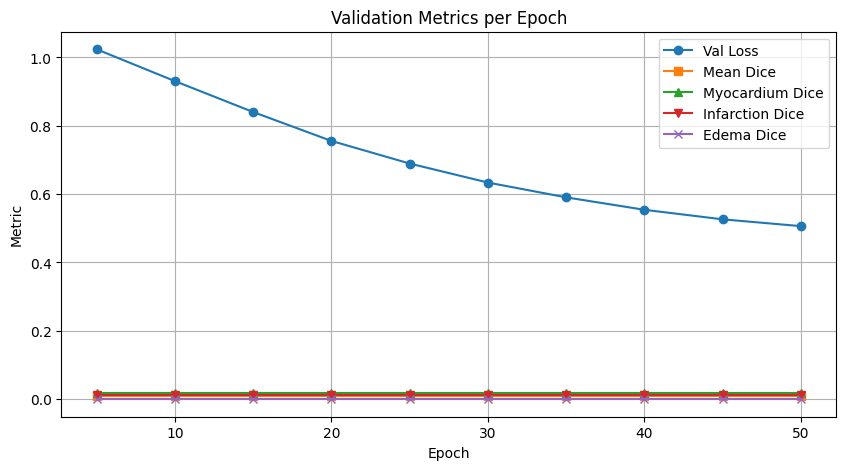


Columns in dice_scores: ['case_id', 'mean_dice', 'dice_Myocardium', 'dice_Infarction', 'dice_Edema', 'MeanDice']

Per-class Dice (mean across cases):
                     mean       std       min       max
mean_dice        0.010135  0.002476  0.006276  0.013172
dice_Myocardium  0.016987  0.004980  0.009814  0.022331
dice_Infarction  0.013419  0.004001  0.009013  0.017185
dice_Edema       0.000000  0.000000  0.000000  0.000000
MeanDice         0.010135  0.002476  0.006276  0.013172


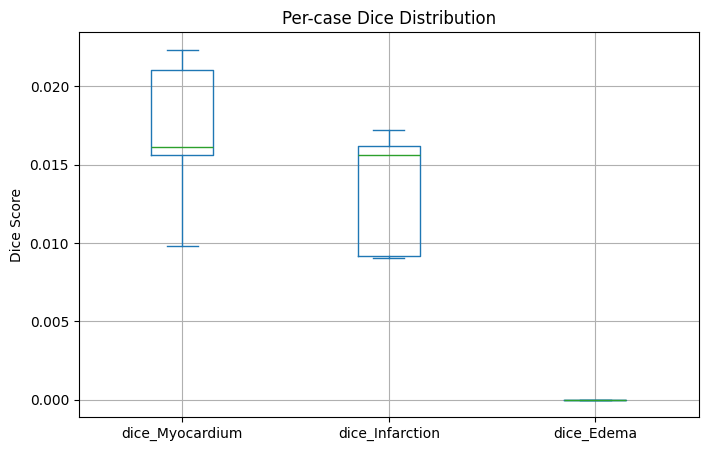


Worst 5 cases (Myocardium Dice):
              case_id  dice_Myocardium
2  myops_training_101         0.009814
0  myops_training_109         0.015639
1  myops_training_117         0.016090
4  myops_training_112         0.021060
3  myops_training_124         0.022331

Best 5 cases (Myocardium Dice):
              case_id  dice_Myocardium
2  myops_training_101         0.009814
0  myops_training_109         0.015639
1  myops_training_117         0.016090
4  myops_training_112         0.021060
3  myops_training_124         0.022331


In [ ]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')
# Path where your CSVs are saved
base_path = "/content/drive/MyDrive/MyoPS2020/predictions"

# Load all CSV files in that folder
csv_files = glob.glob(os.path.join(base_path, "*.csv"))
print("Found CSVs:", csv_files)

dataframes = {}
for f in csv_files:
    name = os.path.splitext(os.path.basename(f))[0]
    df = pd.read_csv(f)
    dataframes[name] = df
    print(f"\n=== {name} ===")
    print(df.head())

# Access them like:
val_summary = dataframes.get("val_summary", None)
dice_scores = dataframes.get("dice_scores", None)

# -------------------------------
# 📈 1. Per-epoch analysis
# -------------------------------
if val_summary is not None:
    print("\nColumns in val_summary:", val_summary.columns.tolist())

    # Plot training curves
    plt.figure(figsize=(10,5))
    plt.plot(val_summary["epoch"], val_summary["val_loss"], marker="o", label="Val Loss")
    if "mean_dice" in val_summary.columns:
        plt.plot(val_summary["epoch"], val_summary["mean_dice"], marker="s", label="Mean Dice")
    if "dice_Myocardium" in val_summary.columns:
        plt.plot(val_summary["epoch"], val_summary["dice_Myocardium"], marker="^", label="Myocardium Dice")
    if "dice_Infarction" in val_summary.columns:
        plt.plot(val_summary["epoch"], val_summary["dice_Infarction"], marker="v", label="Infarction Dice")
    if "dice_Edema" in val_summary.columns:
        plt.plot(val_summary["epoch"], val_summary["dice_Edema"], marker="x", label="Edema Dice")

    plt.xlabel("Epoch")
    plt.ylabel("Metric")
    plt.title("Validation Metrics per Epoch")
    plt.legend()
    plt.grid(True)
    plt.show()

# -------------------------------
# 📊 2. Per-case analysis
# -------------------------------
if dice_scores is not None:
    print("\nColumns in dice_scores:", dice_scores.columns.tolist())

    # Summary stats
    print("\nPer-class Dice (mean across cases):")
    print(dice_scores.describe().T[["mean","std","min","max"]])

    # Boxplot per class
    dice_cols = [c for c in dice_scores.columns if c.startswith("dice_")]
    dice_scores[dice_cols].plot(kind="box", figsize=(8,5))
    plt.title("Per-case Dice Distribution")
    plt.ylabel("Dice Score")
    plt.grid(True)
    plt.show()

    # Worst and best cases for myocardium
    if "dice_Myocardium" in dice_scores.columns:
        worst = dice_scores.sort_values("dice_Myocardium").head(5)
        best = dice_scores.sort_values("dice_Myocardium").tail(5)
        print("\nWorst 5 cases (Myocardium Dice):")
        print(worst[["case_id","dice_Myocardium"]])
        print("\nBest 5 cases (Myocardium Dice):")
        print(best[["case_id","dice_Myocardium"]])